In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("u.data",sep='\t', names=['user_id','item_id','rating','timestamp'])
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [19]:
# merging movie titles with this data set now
movies=pd.read_csv('C:/Users/SHIVAM/ml-20m/movies.csv')
movie_titled=movies.iloc[:,:2]
movie_titles=pd.DataFrame(movie_titled)
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [20]:
df=pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,"Usual Suspects, The (1995)"
1,290,50,5,880473582,"Usual Suspects, The (1995)"
2,79,50,4,891271545,"Usual Suspects, The (1995)"
3,2,50,5,888552084,"Usual Suspects, The (1995)"
4,8,50,5,879362124,"Usual Suspects, The (1995)"


In [22]:
df.describe()

,user_id,item_id,rating,timestamp
count,98682.000000,98682.000000,98682.000000,9.868200e+04
mean,462.390172,422.043280,3.534495,8.835203e+08
std,266.665941,328.174446,1.124576,5.344925e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,174.000000,3.000000,8.794481e+08
50%,447.000000,318.000000,4.000000,8.828256e+08
75%,682.000000,627.000000,4.000000,8.882068e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [24]:
#finding average rating for each movie
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.548387
1-900 (06) (1994),3.384615
101 Dalmatians (1996),4.200000
12 Angry Men (1957),4.047619
187 (One Eight Seven) (1997),1.666667


In [25]:
#Now, we see no. of ratings for each movie
ratings['number_of_ratings']=df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.548387,31
1-900 (06) (1994),3.384615,13
101 Dalmatians (1996),4.200000,5
12 Angry Men (1957),4.047619,21
187 (One Eight Seven) (1997),1.666667,3


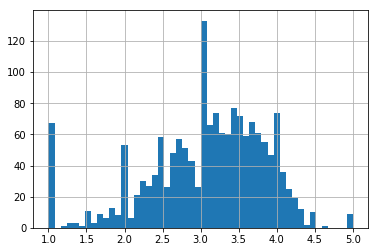

In [26]:
# now we observe data and rating
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)
#most movies are rated between 2.4 and 4.

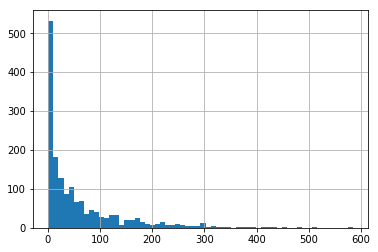

In [28]:
# now visulaizing no. of ratings
ratings['number_of_ratings'].hist(bins=60)

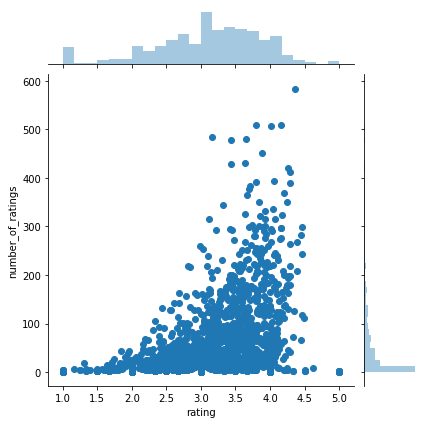

In [30]:
# the above data tells that most of the few movies have few rating. The most reviewed movies are famous.
# Now, checking no. of ratings vs ratings of movies
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

'''From the diagram we can see that their is a positive relationship between the average rating of a movie and the number of 
ratings. The graph indicates that the more the ratings a movie gets the higher the average rating it gets. This is important 
to note especially when choosing the threshold for the number of ratings per movie.'''

# Building Recommendation system

In [31]:
movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating') # pivot_table create matrix
movie_matrix.head()
# using matrix approach where user_id is row and movie names are column. Nan is where user haven't gave ratings

title,'Til There Was You (1997),1-900 (06) (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (One Eight Seven) (1997),2 Days in the Valley (1996),2 ou 3 choses que je sais d'elle (2 or 3 Things I Know About Her) (1967),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"301, 302 (301/302) (1995)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),"Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)",Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#To look at most rated movie now.
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
"Usual Suspects, The (1995)",4.359589,584
"Kid in King Arthur's Court, A (1995)",3.803536,509
City Hall (1996),4.155512,508
Mighty Morphin Power Rangers: The Movie (1995),4.007890,507
"Perez Family, The (1995)",3.156701,485
Nemesis 2: Nebula (1995),3.656965,481
Natural Born Killers (1994),3.441423,478
Toy Story (1995),3.878319,452
Quiz Show (1994),3.631090,431


In [34]:
# here we have to input those movies which user had already viewed.. To test only
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']
AFO_user_rating.head()
contact_user_rating.head()

user_id
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Contact (1997), dtype: float64

In [37]:
#Now, find correlation 
similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)
similar_to_air_force_one.head()

title
'Til There Was You (1997)      NaN
1-900 (06) (1994)              NaN
101 Dalmatians (1996)          NaN
12 Angry Men (1957)            NaN
187 (One Eight Seven) (1997)   NaN
dtype: float64

In [39]:
#Now, find correlation with all movies
similar_to_contact = movie_matrix.corrwith(contact_user_rating)
similar_to_contact.head()


title
'Til There Was You (1997)      NaN
1-900 (06) (1994)              NaN
101 Dalmatians (1996)          NaN
12 Angry Men (1957)            NaN
187 (One Eight Seven) (1997)   NaN
dtype: float64

In [62]:
#As noticed earlier our matrix had very many missing values since not all the movies were rated by all the users. 
#We therefore drop those null values and transform correlation results into dataframes to make the results look more appealing.
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.fillna(-999)
corr_contact.head()
# there were no one who gave ratings to movies similar to this. so correlation haven,t formed 

,Correlation
title,
'Til There Was You (1997),NaN
1-900 (06) (1994),NaN
101 Dalmatians (1996),NaN
12 Angry Men (1957),NaN
187 (One Eight Seven) (1997),NaN


In [63]:
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
title,
Air Force One (1997),1.0
"Alphaville (Alphaville, une étrange aventure de Lemmy Caution) (1965)",-1.0
"Apple Dumpling Gang, The (1975)",-1.0
"Arrival, The (1996)",0.5
Careful (1992),-1.0


In [64]:
#here, may some people gave 5 ratings to a movies whose mean will be 5. So , it can be recommended to them too. to get rid of it,we solution
corr_AFO = corr_AFO.merge(ratings,on='title')
corr_contact = corr_contact.merge(ratings,on='title')
corr_AFO .head()


,correlation,rating,number_of_ratings
title,,,
Air Force One (1997),1.0,2.250000,4
"Alphaville (Alphaville, une étrange aventure de Lemmy Caution) (1965)",-1.0,2.558824,34
"Apple Dumpling Gang, The (1975)",-1.0,4.127660,47
"Arrival, The (1996)",0.5,3.123418,316
Careful (1992),-1.0,3.427778,180


In [65]:
corr_contact.head()

,Correlation,rating,number_of_ratings
title,,,
'Til There Was You (1997),NaN,2.548387,31
1-900 (06) (1994),NaN,3.384615,13
101 Dalmatians (1996),NaN,4.200000,5
12 Angry Men (1957),NaN,4.047619,21
187 (One Eight Seven) (1997),NaN,1.666667,3


In [66]:
corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,rating,number_of_ratings
title,,,
"Sum of Us, The (1994)",1.0,3.136000,125
Higher Learning (1995),1.0,2.615385,143
I.Q. (1994),1.0,2.943038,158
Natural Born Killers (1994),1.0,3.441423,478
"Madness of King George, The (1994)",1.0,4.262626,198
Pushing Hands (Tui shou) (1992),1.0,3.768041,194
National Lampoon's Senior Trip (1995),1.0,2.546875,128
"War, The (1994)",1.0,3.587302,189
"Jerky Boys, The (1995)",1.0,3.360465,172


In [67]:
#We shall now obtain the movies that are most similar to Air Force One (1997) by limiting them to movies that have at least 100 
#reviews. We then sort them by the correlation column and view the first 10.
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)
#there exist no correlation.

,Correlation,rating,number_of_ratings
title,,,
8 Seconds (1994),NaN,4.491071,112
Addams Family Values (1993),NaN,3.129630,162
Aladdin (1992),NaN,3.792079,202
All About Eve (1950),NaN,2.702970,101
All Dogs Go to Heaven 2 (1996),NaN,3.621849,119
"American President, The (1995)",NaN,3.847458,236
And Nobody Weeps for Me (Und keiner weint mir nach) (1996),NaN,4.136054,147
Anne Frank Remembered (1995),NaN,3.824000,125
Antonia's Line (Antonia) (1995),NaN,3.720307,261
